# Sobre la tarea 1.
## No son 52 bits sino 53
Varias fuentes:

* En la  [documentación de Python en línea](https://docs.python.org/3/tutorial/floatingpoint.html) se muestra (sección 15.1, representación del error) que Python usa 53 bits para la precisión en la mantisa.

* Tambíen [StackOverflow](https://stackoverflow.com/questions/18409496/is-it-52-or-53-bits-of-floating-point-precision:)
En la pregunta "is it 52 or 53 bits of floating point precision" discute este asunto.

* Icluso [Wikipedia](https://en.wikipedia.org/wiki/Double-precision_floating-point_format) menciona este detalle. 

* Esto hace que el [epsilon](https://en.wikipedia.org/wiki/Machine_epsilon) de la máquina cambie.



La cuestión es la siguiente. 
La formula para evaluar el numero en IEEE es
$$(-1)^{\text{sign}} 2^{c-1023} \times 1. \times \text{fraction} $$

En el sistema little endian la fraccion (fraction/mantisa) se evalua al revés de como lo hacemos.
Es decir, la formula es 

$$(-1)^{\text{sign}} 2^{c-1023} \times \left (  1 + \sum_{i=1}^{52} b_{52-i} 2^{-i}  \right ) $$
Ver la figura de Wikipedia enseguida.



La cuestion

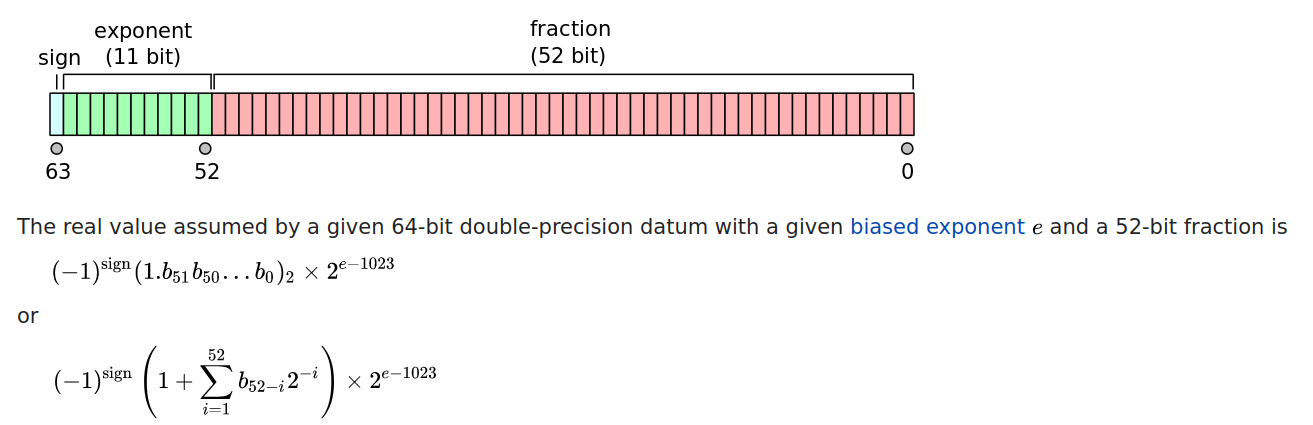

Observe el "1" antes del punto en la expresion. Ese "1" es implicito y por lo tanto es un bit que nos ahorramos. En la evaluacion de la doble precision ese 1 hace parte de la cadena de bits para incrementar de 52 a 53 bits. Por eso algunos llaman mantisa a los 52 bits (o fracción) y otros llaman a "significand" (significante?) a la cadena de 53 bits comenzando con el 1. 

In [ ]:
# tenemos 0.2


## 0.2 a decimal, con multiplicaciones suscesivas

$$0.2 \times 2 = 0.4   \quad \text{la parte entera es 0}$$
$$0.4\times 2 = 0.8   \quad \text{la parte entera es 0}$$
$$0.8 \times 2 = 1.6   \quad \text{la parte entera es 1, la parte decimal es 0.6}$$
$$0.6 \times 2 = 1.2   \quad \text{la parte entera es 0}$$
Estamos en circulos.

$$\left ( 0.2 \right )_{10} = 0.0011 0011 \cdots =1. 1001 100110011001100110011001100110011001100110011001 \times 2^{-3}$$





In [4]:
binario=""
periodo="1001"

for i in range(int(52/4)):
    binario += periodo

print("numero binario a 52 cifras despues del punto",binario)
print("numero de cifras ",len(binario))

numero binario a 52 cifras despues del punto 1001100110011001100110011001100110011001100110011001
numero de cifras  52


In [7]:
# convertimoms este numero a decimal
numero = 0; n=1
for b in binario :
    numero += int(b)*2**(-n)
    n +=1

numero = (1.0 + numero)*2**(-3)
print(numero)



0.19999999999999998


In [9]:
binario=""
periodo="1001"

for i in range(int(52/4)):
    binario += periodo

binario += "1"

print("numero binario a 53 cifras despues del punto",binario)
print("numero de cifras ",len(binario))

numero binario a 53 cifras despues del punto 10011001100110011001100110011001100110011001100110011
numero de cifras  53


In [11]:
# convertimoms este numero a decimal
numero = 0; n=1
for b in binario :
    numero += int(b)*2**(-n)
    n +=1



numero = (1.0 + numero)*2**(-3)
print("%.30f"%numero)



0.200000000000000011102230246252


## Division de enteros:


In [13]:
x=0.2
frac = x.as_integer_ratio()
print(frac)

(3602879701896397, 18014398509481984)


In [19]:
a = frac[0]/frac[1]
print("%.30f"%a)

0.200000000000000011102230246252


In [18]:
frac[1]

18014398509481984

In [20]:
from decimal import Decimal
from fractions import Fraction
Fraction.from_float(0.2)

Fraction(3602879701896397, 18014398509481984)

## Varias formas de entender la precision en bits de Python

In [21]:
N=100 # un numero "grande"
for i in range(100):
    x=2**i
    if float(x) == float(x+1):
        print(i)
        break

53


In [23]:
eps=1.0
N=1000 # un numero grande
for i in range(N):
    if 1.0 + eps == 1.0:
        print(i)
        break
    eps *=0.5

53


In [24]:
eps

1.1102230246251565e-16

In [25]:
2**(-53)

1.1102230246251565e-16

In [26]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

# Objetos y Clases
## Objetos
No es muy distinto un objeto en la practica al objeto en la ciencia de la computacion. Obvio que en la ciencia de la computacion es abstracto. 
El carro en la calle es concreto y en el computador es "abstracto". 

Un objeto es parte de un sistema, y de esta forma, un sistema es un conjunto de objetos y sus relaciones.

Los obejtos tienen ciertas caracteristicas:

*  Tienen atributos (attributes):
    * adjetivos
    * sustantivos
* Tienen comportamiento (behavior). Los verbos.  Al comportamiento se le llama metodos. Los metodos describen el comportamiento de un objeto. Un objeto tiene un **estado**. Son los atributos y comportamientos como funcion del tiempo. 

Los miembros (atributos, comportamientos) pueden tener tres formas de contacto con el exterior.

* publica: El  color de un carro en la calle
* privado: Solo se puede ver al interior del objeto. Por ejemplo la temperatura. 
* protected. Solo lo pueden accesar su clase y descendientes. 



#### Como se comunican los objetos?
Se comunican con **mensajes**. Los mensajes se pasan con **parametros** o **argumentos** y nombres de funciones (metodos). 

## Clases:
La clase es la descripcion del objeto en abstracto. 

* La  clase  es  un  mapa (blueprint) del objeto. Indica  como se construye el objeto
*  La clase  es un tipo. 
* En la clase se describen  los atributos y los metodos.
* La instanciacion de la clase es el objeto. The object is an instantiation of the class.


#### Un consejo acerca de los nombres de las variables y metodos.
* Deben  ser descriptivas. Es decir, en ve de ```clase A``` , si es un carro, entonces clase ```Carro```.

* Las clases deben ser CamelCase. LavaManos,  PerroBravo,
* las variables y metodos deben ser dromedaryCase (perroMuerda), indioBravo.


Al proceso de poner todos los atributos y comportamientos juntos se le llama **encapsulacion** (encapsulation). Yo diria "enclassulation" 

Estas y otras recomendacionles las encontrar en el
[PEP 8](https://peps.python.org/pep-0008/).


Hablemos de UML. Unified Modeling Language. 



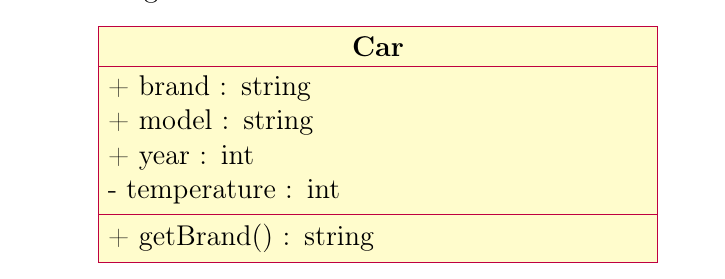

En este ejemplo vemos que la clase ```Car``` tiene 4 atributos, brand, model, year, temperature. Que los atributos brand, model, year son **publicos** y que el atributo temperature es **privado**. La clase tiene un metodo: getBrand() que es publico. Observe que cada atributo y metodo tienen el tipo de retorno. Es decir ```string```, ```int```, etc. Estos tipos no son importantes en Python. Python es "typeless".



Habemos mas de **encapsulacion**.

* La encapsulacion "binds" (ata) los atributos y los comportamientos en una sola capsula.
* En la encapsulacion sirve para ocultar informacion que no queremos revelar a clases por fuera de nosotros (la clase en cuestion). En ingles "information hidding". Hay principio : [el principio de menor privilegio](https://g.co/kgs/Zy62J8)  es importante tener en cuenta cuando se programa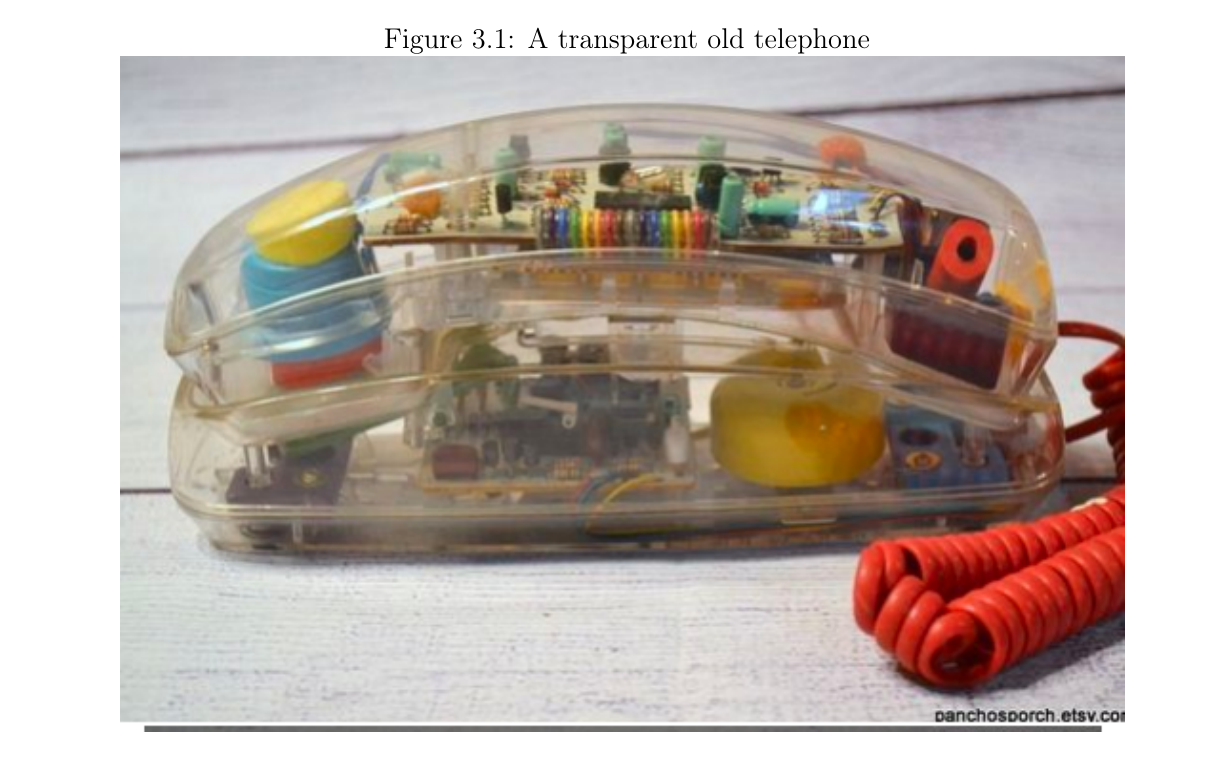